In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn.metrics import confusion_matrix
y_actu = [2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2]
y_pred = [0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2]
confusion_matrix(y_actu, y_pred)

array([[3, 0, 0],
       [0, 1, 2],
       [2, 1, 3]])

In [144]:
import pandas as pd
y_actu = pd.Series([2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2], name='Actual')
y_pred = pd.Series([0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
np.array(df_confusion)

array([[3, 0, 0],
       [0, 1, 2],
       [2, 1, 3]])

In [11]:
pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
Actual,,,,
0,3,0,0,3
1,0,1,2,3
2,2,1,3,6
All,5,2,5,12


In [43]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_conf_norm

Predicted,0,1,2
Actual,,,
0,1.000000,0.000000,0.000000
1,0.000000,0.333333,0.333333
2,0.666667,0.333333,0.500000


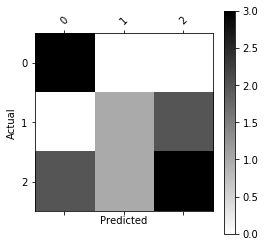

In [176]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    plt.show()

plot_confusion_matrix(df_confusion)

In [172]:
actual = np.array(y_actu)
predicted = np.array(y_pred)

actual = np.random.randint(0, 100, 1000000)
predicted = np.random.randint(0, 100, 1000000)

def confusion_matrix(actual, predicted, num_classes, normalize=False):
    m = [[0] * num_classes for i in range(num_classes)]
    for i in range(len(actual)):
        m[actual[i]][predicted[i]] += 1
    m = np.array(m)
    if normalize:
        m = m / np.max(m)
    return m

def confusion_matrix2(actual, predicted, num_classes, normalize=False):
    cm = np.zeros((num_classes, num_classes))
    for i in range(len(actual)):
        cm[actual[i],predicted[i]] += 1
    if normalize:
        cm = cm / np.max(cm)
    return cm

def accuracy(actual, predicted):
    return (actual == predicted).sum() / float(len(actual))

# np.sum(np.diag(cm))/np.sum(cm) # is faster

classes = np.arange(100)
print(confusion_matrix(actual, predicted, len(classes)))
print(accuracy(actual, predicted))

[[ 97  93  97 ...,  78  92  78]
 [103  97 105 ...,  91  93 116]
 [112 100 114 ..., 112  87  77]
 ..., 
 [105  96  85 ..., 101 105 100]
 [ 76  86  92 ..., 102 107  92]
 [106 105 105 ...,  78 112 100]]
0.009956


In [174]:
%%timeit
cm = confusion_matrix(actual, predicted, len(classes))

166 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [173]:
%%timeit
cm = confusion_matrix2(actual, predicted, len(classes))

360 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [129]:
%%timeit
ac = accuracy(actual, predicted)

14.1 µs ± 128 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [133]:
%%timeit
ac = accuracy(actual, predicted)

15.2 µs ± 27.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [166]:
def create_conf_matrix(expected, predicted, n_classes):
    m = [[0] * n_classes for i in range(n_classes)]
    for pred, exp in zip(predicted, expected):
        m[pred][exp] += 1
    return m

def calc_accuracy(conf_matrix):
    t = sum(sum(l) for l in conf_matrix)
    return sum(conf_matrix[i][i] for i in range(len(conf_matrix))) / t

cm = create_conf_matrix(actual, predicted, len(classes))
#print(cm)
print(calc_accuracy(cm))

0.0086


In [165]:
%%timeit
cm = create_conf_matrix(actual, predicted, len(classes))

1.59 ms ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [102]:
%%timeit
ac = calc_accuracy(cm)

93.3 µs ± 299 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [112]:
cm = np.array(cm)

In [113]:
%%timeit
ac = np.sum(np.diag(cm))/np.sum(cm)

9.91 µs ± 257 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


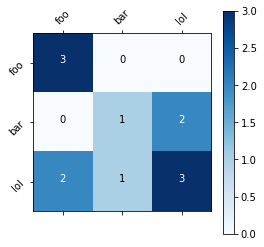

In [175]:
import itertools

def plot_confusion_matrix(confusion_matrix, classes):
    cmap = plt.cm.Blues
    n = len(classes)
    plt.matshow(confusion_matrix, cmap=cmap)
    plt.colorbar()
    ticks = np.arange(n)
    plt.xticks(ticks, classes, rotation=45)
    plt.yticks(ticks, classes, rotation=45)
    #plt.ylabel('actual')
    #plt.xlabel('prediction')
    thresh = confusion_matrix.max() / 2.
    for i, j in itertools.product(ticks, ticks):
        plt.text(j, i, confusion_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")
    plt.show()

plot_confusion_matrix(np.array(df_confusion), ['foo','bar','lol'])